In [ ]:
# Import pustaka yang diperlukan
import pandas as pd #memanipulasi data dalam bentuk tabel (DataFrame).
import numpy as np #Digunakan untuk operasi matematika dan manipulasi array numerik.
import matplotlib.pyplot as plt #membuat berbagai jenis grafik
import seaborn as sns #untuk korelasi dan distribusi data.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler #pustaka untuk pemrosesan data
from sklearn.cluster import KMeans #untuk melakukan algoritma clustering K-Means, yang mengelompokkan data ke dalam sejumlah klaster berdasarkan kemiripan.
from sklearn.metrics import silhouette_score #untuk mengevaluasi kualitas hasil clustering dengan mengukur seberapa baik data dalam suatu klaster
from sklearn.decomposition import PCA # untuk membuat visual PCA
from google.colab import drive #menghubungkan Google Drive

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Students_Grading_Dataset.csv')

Mounted at /content/drive


In [ ]:
# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
#menampilkan 5 data awal
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [ ]:
df.dtypes

,0
Student_ID,object
First_Name,object
Last_Name,object
Email,object
Gender,object
Age,int64
Department,object
Attendance (%),float64
Midterm_Score,float64
Final_Score,float64


In [ ]:
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),516
Midterm_Score,0
Final_Score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Deskripsi statistik data numerik
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


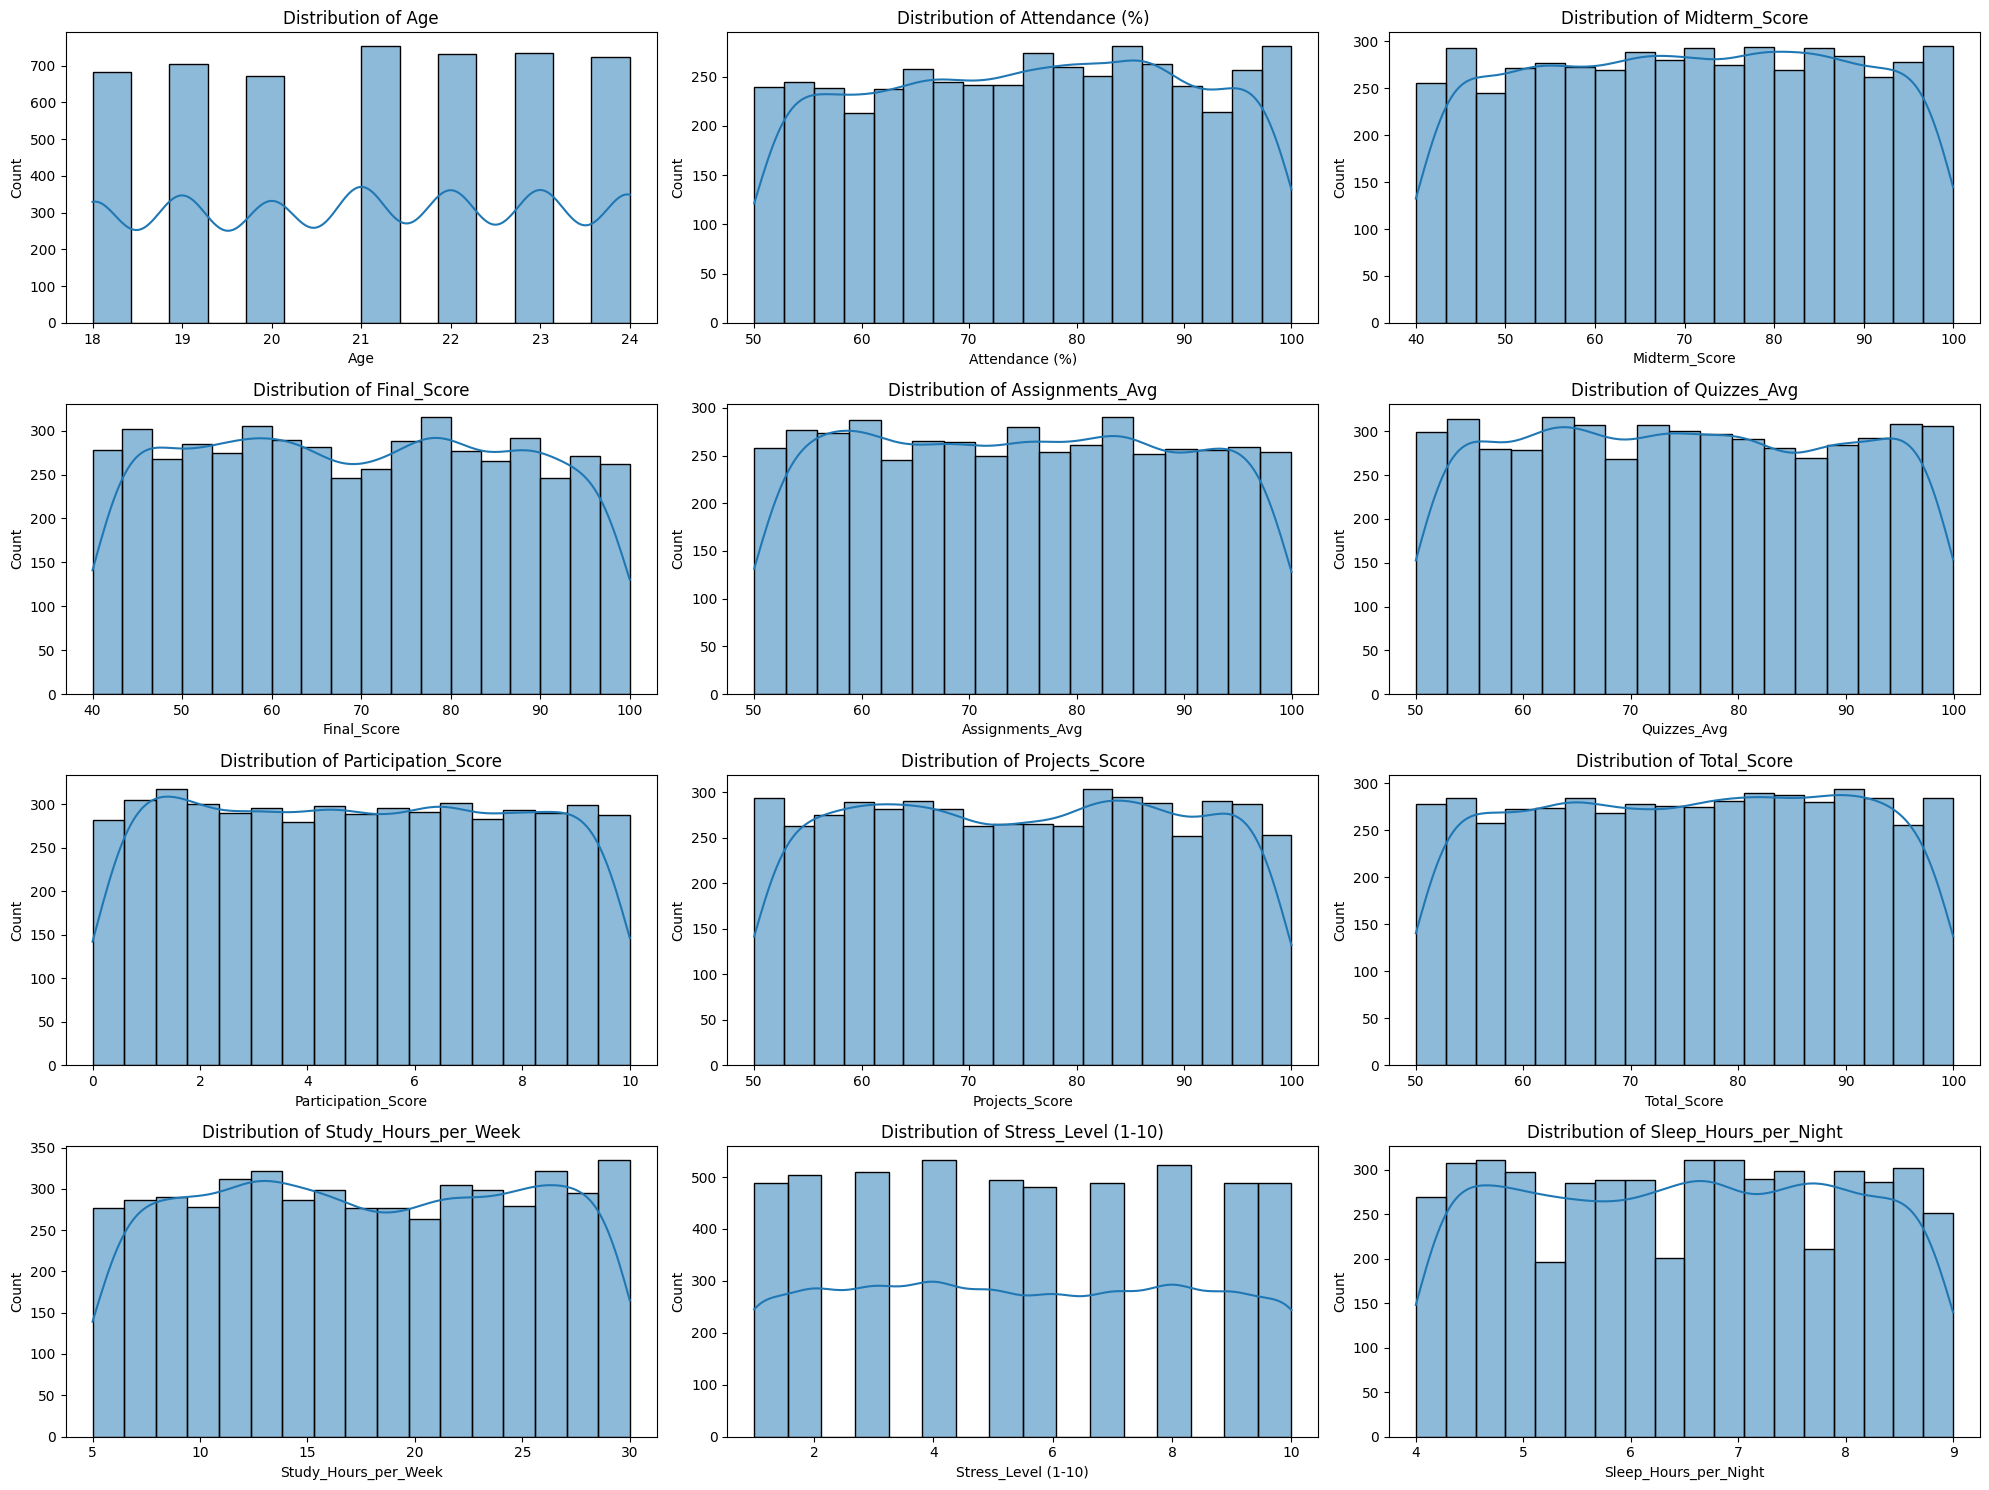

In [ ]:
#EDA
#Univariate analysis (numerik)
numerical_features = df.select_dtypes(include=np.number)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_features.columns):
    mean = df[column].mean()
    median = df[column].median()
    std = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()

    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

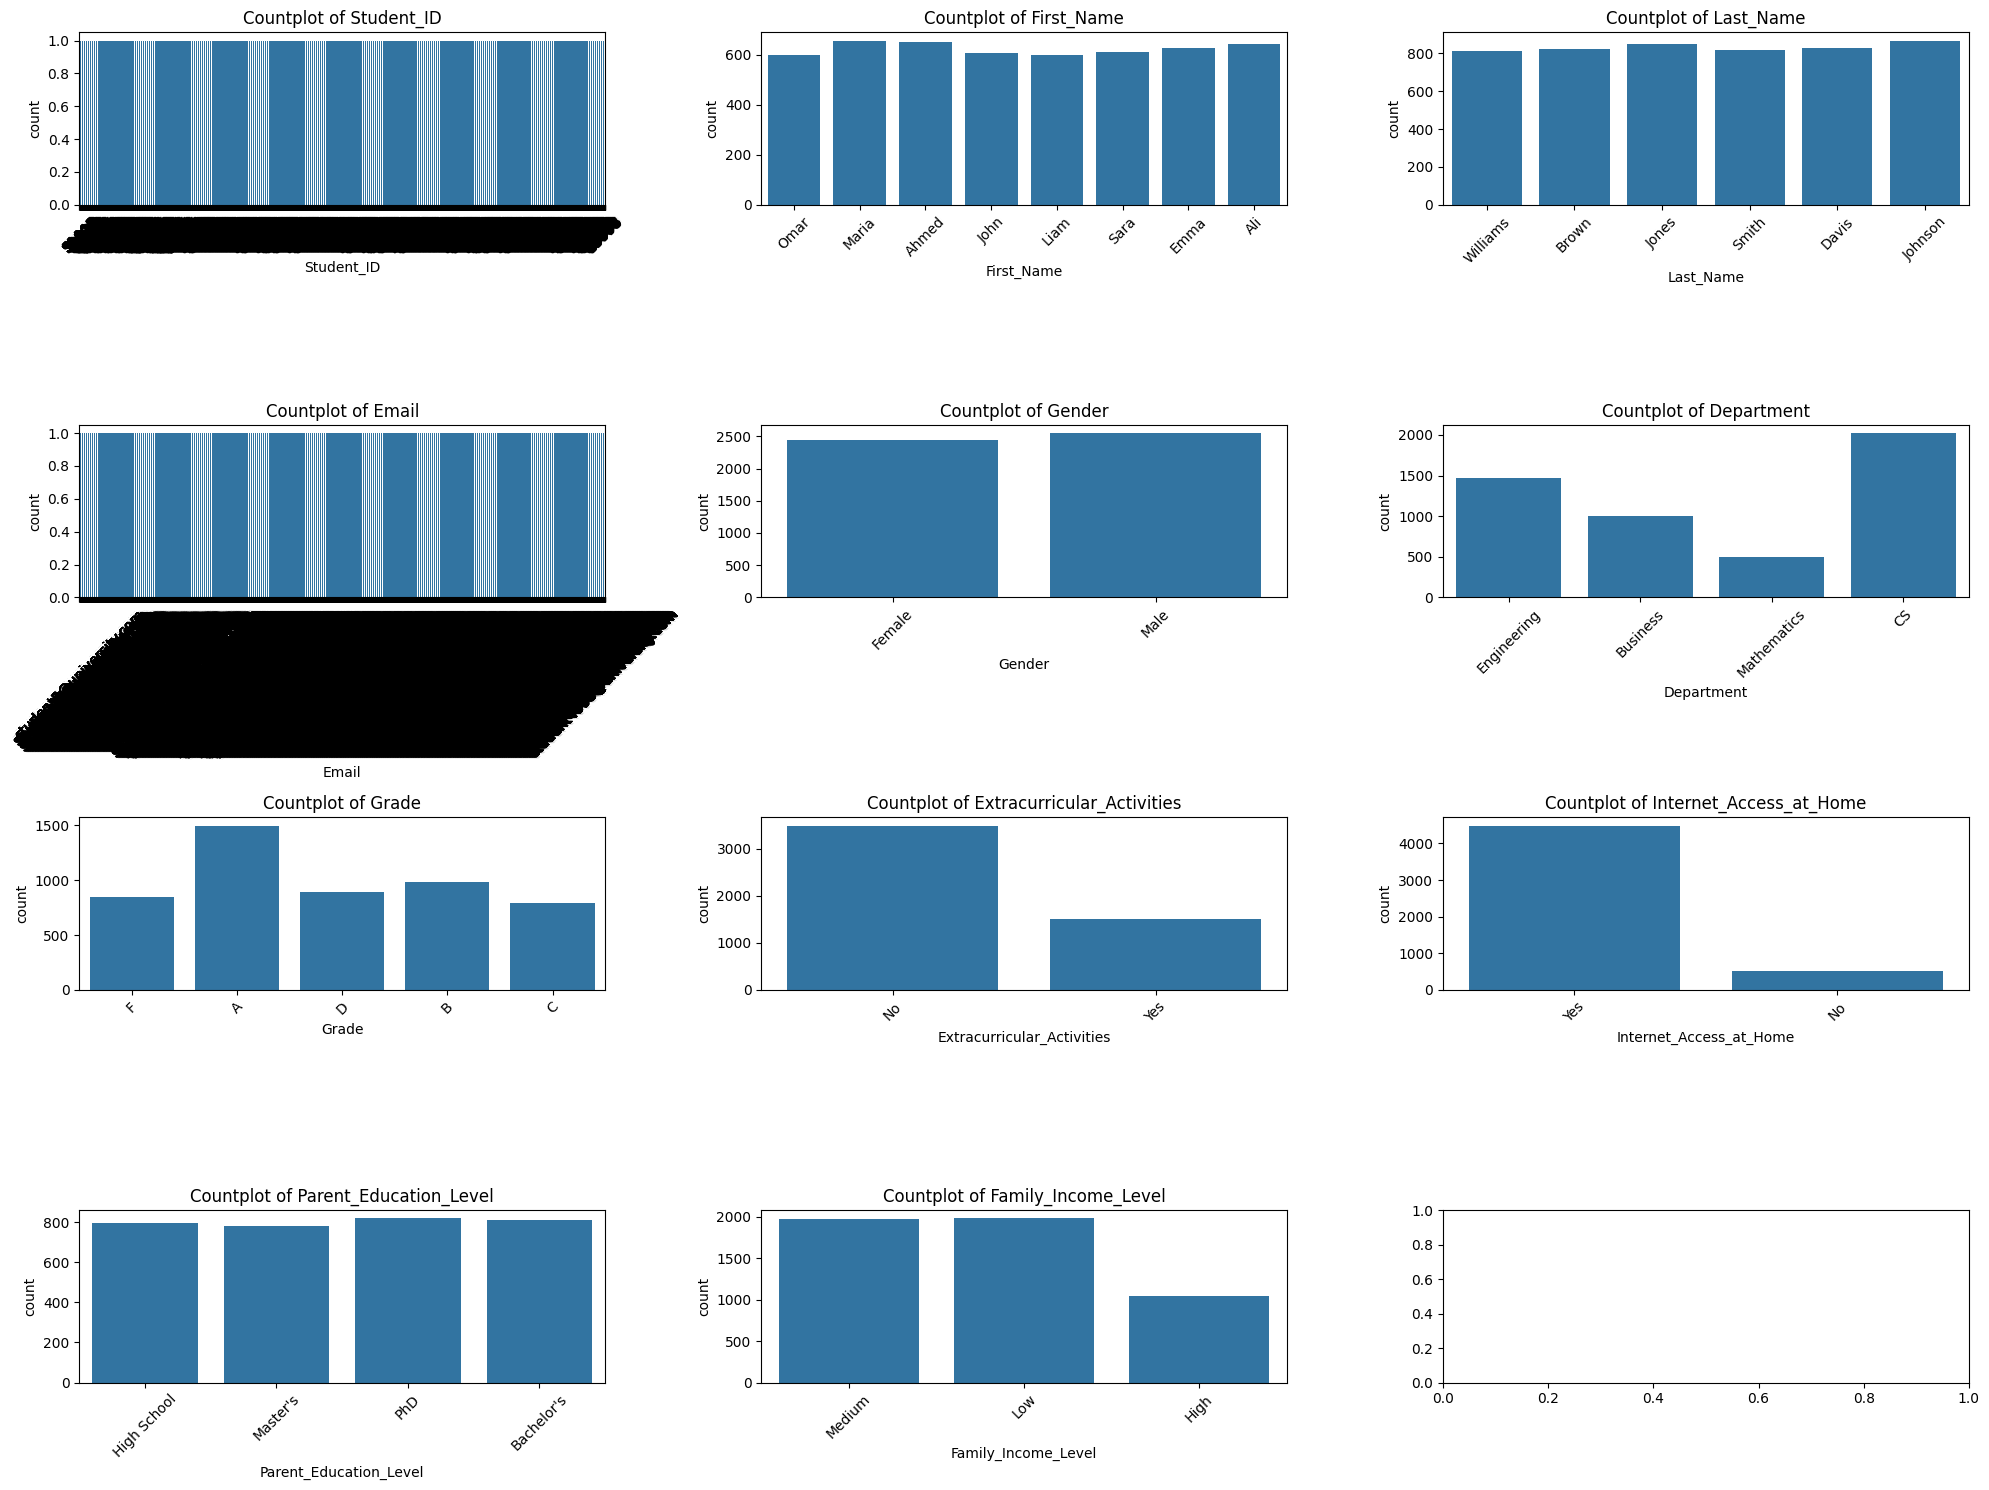

In [ ]:
#Univariate analysis (Kategori)
categorical_features = df.select_dtypes(include='object').columns.tolist()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(categorical_features):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot of {column}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

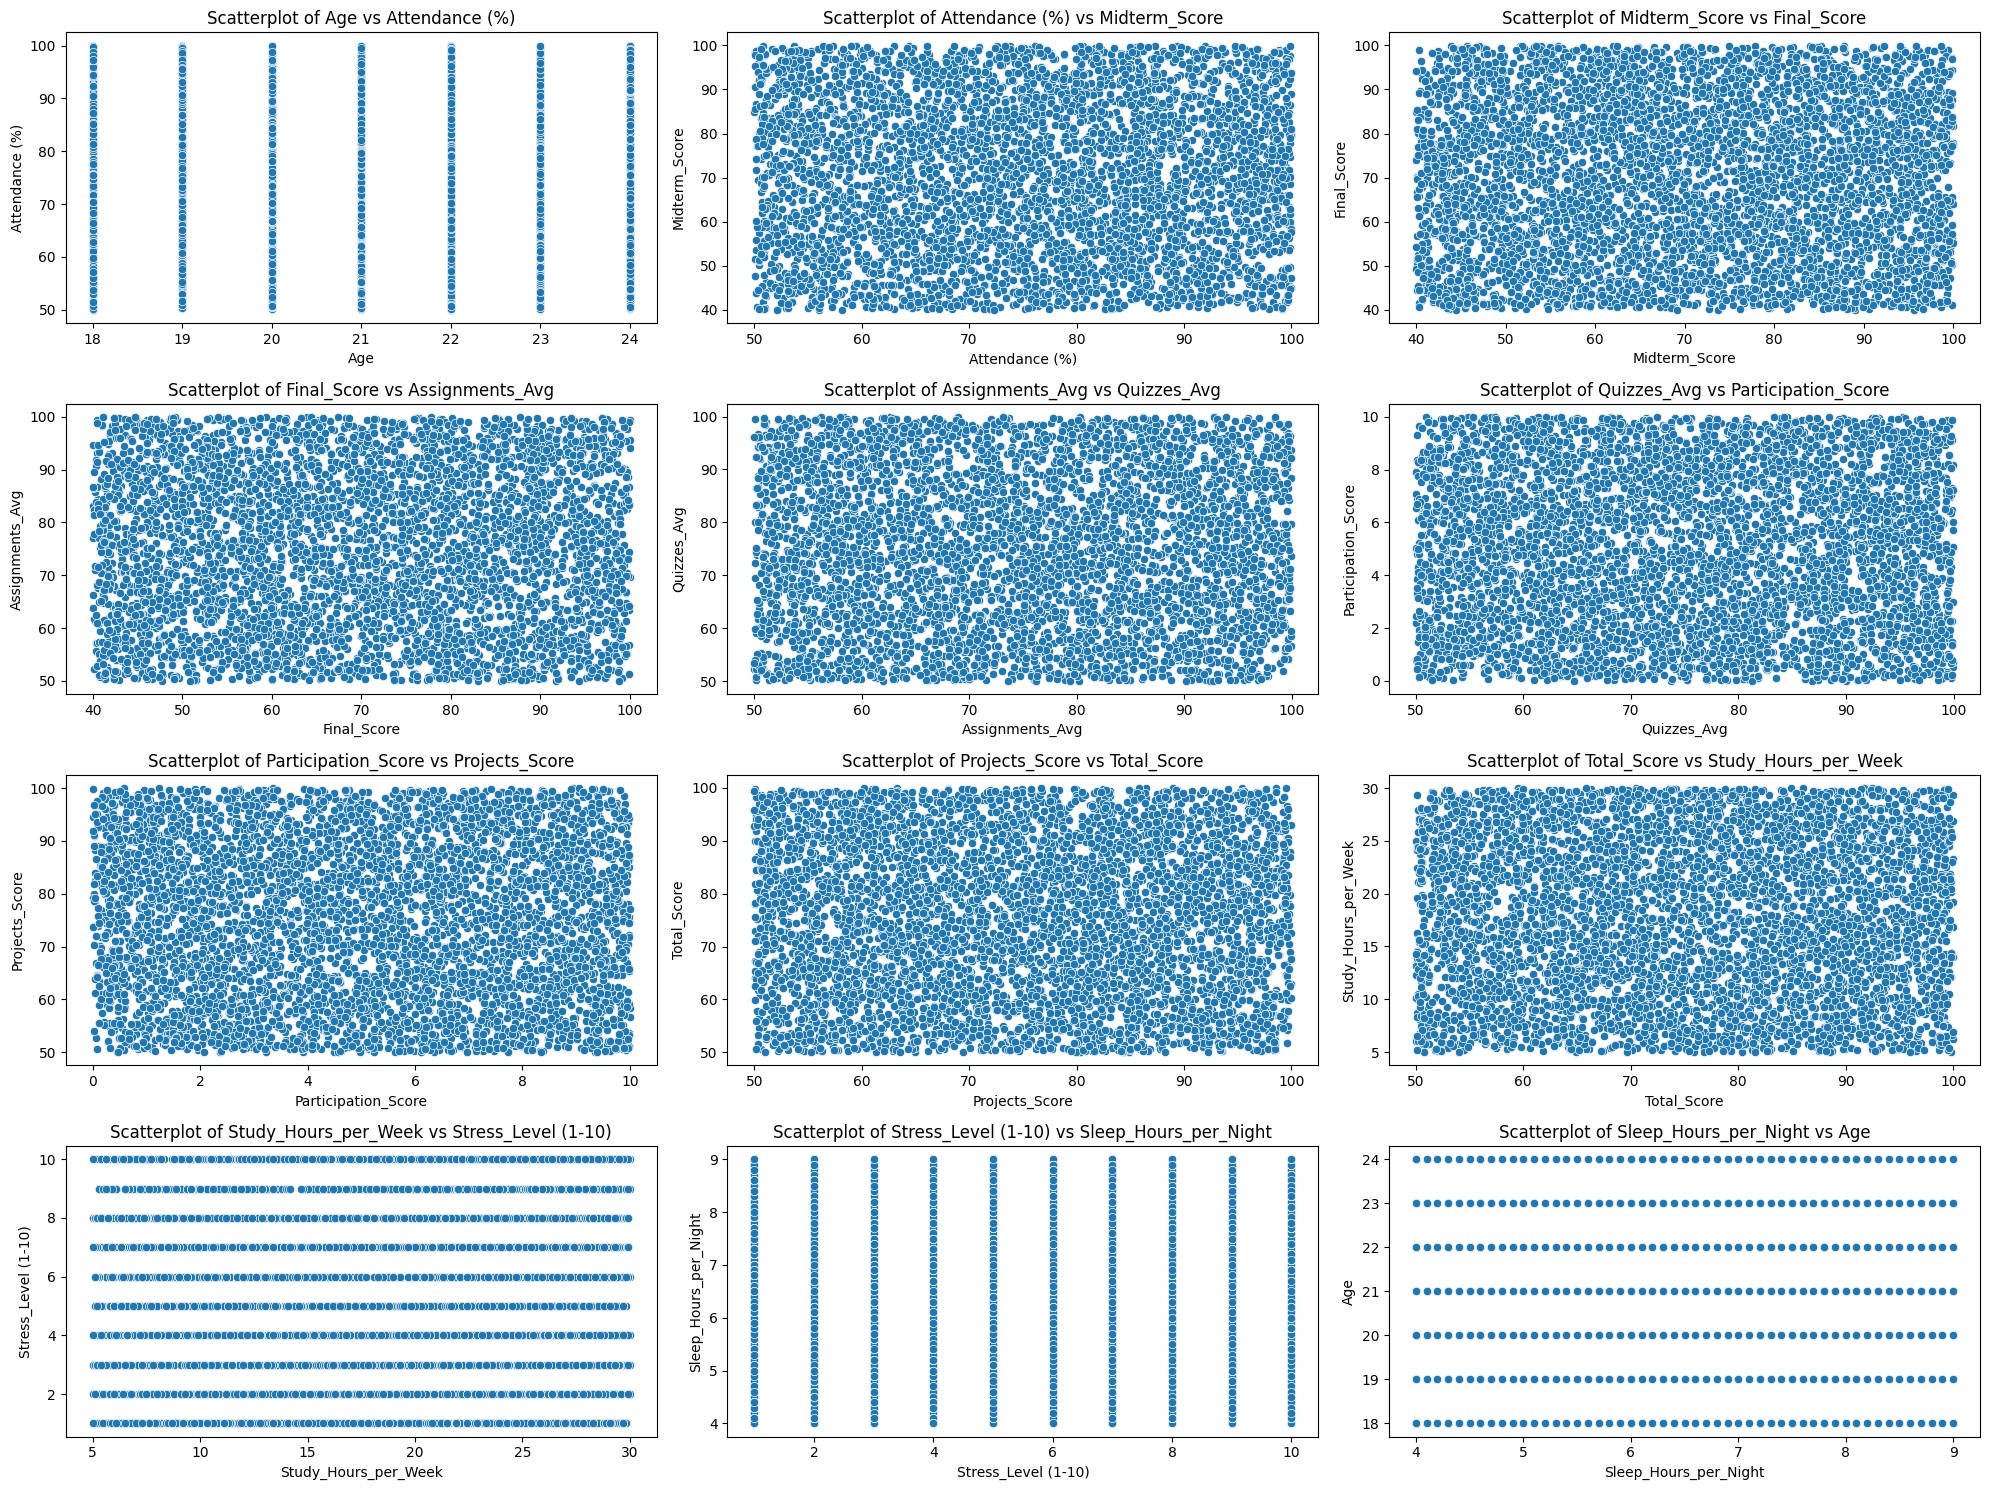

In [ ]:
#Bivariate Analysis
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i in range(min(12,len(numerical_features.columns))):
    column1 = numerical_features.columns[i]
    column2_index = (i + 1) % len(numerical_features.columns)
    column2 = numerical_features.columns[column2_index]

    sns.scatterplot(x=column1, y=column2, data=df, ax=axes[i])
    axes[i].set_title(f"Scatterplot of {column1} vs {column2}")

plt.tight_layout()
plt.show()


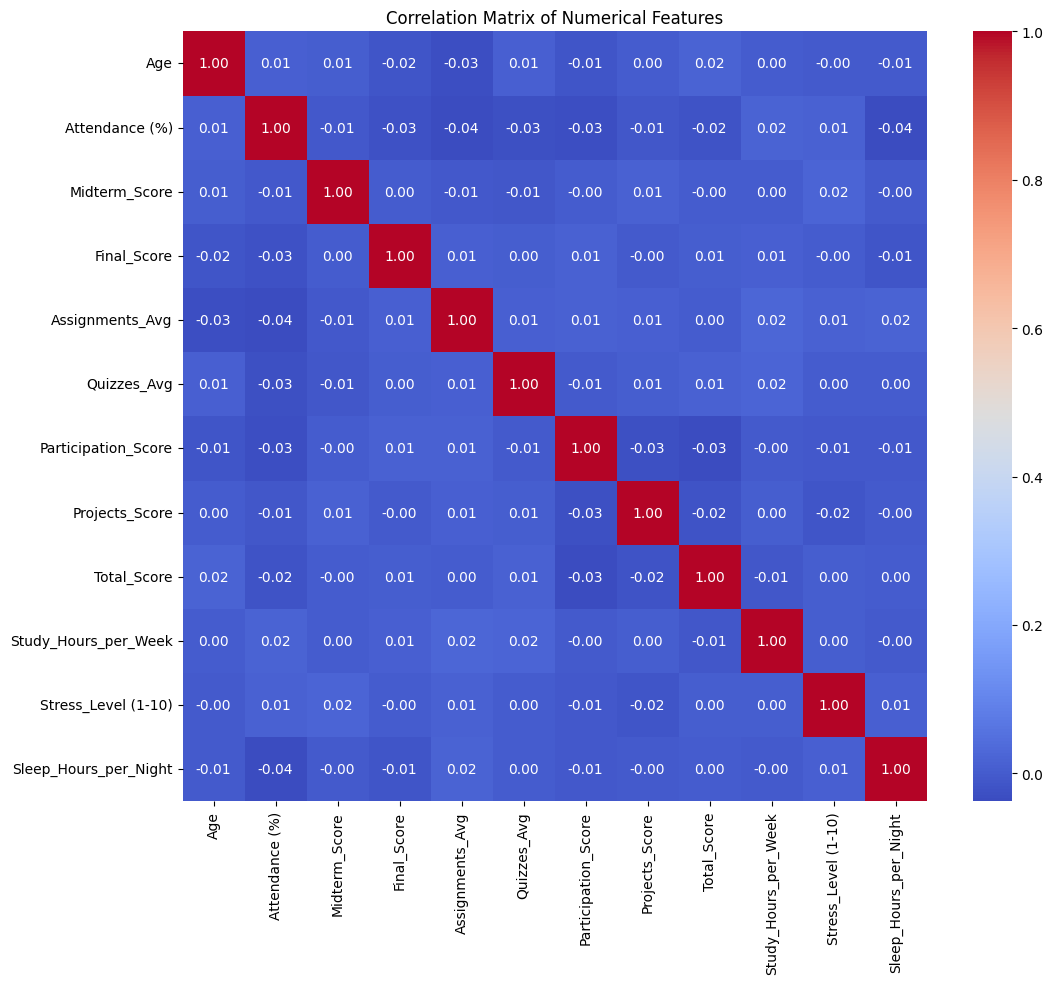

In [ ]:
# Multivariate analysis
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
#preprocessing
#drop fitur tidak di perlukan
df.drop(['Student_ID',
         'First_Name',
         'Last_Name',
         'Email',
         'Grade',
         'Total_Score',
         'Extracurricular_Activities',
         'Internet_Access_at_Home',
         'Department',
         'Parent_Education_Level'], axis=1, inplace=True)


In [ ]:
# Handling missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical with mode
    else:
        df[col] = df[col].fillna(df[col].mean())  # Fill numerical with mean

In [ ]:
# Encoding kategorikal menggunakan Label Encoding
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# scaling menggunakan MinMaxScaler
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Menampilkan DataFrame yang telah diproses sebelumnya
print(df.head())
print(df.info())

   Gender       Age  Attendance (%)  Midterm_Score  Final_Score  \
0     0.0  0.666667        0.045609       0.250584     0.297099   
1     1.0  0.000000        0.945389       0.954151     0.096699   
2     1.0  1.000000        0.143629       0.450984     0.894965   
3     0.0  1.000000        0.902981       0.129877     0.677392   
4     0.0  0.833333        0.083417       0.109870     0.648383   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0         0.684674     0.481274                0.399        0.717944   
1         0.496172     0.885440                0.832        0.112823   
2         0.354142     0.714400                0.505        0.475695   
3         0.321329     0.870819                0.654        0.842368   
4         0.937375     0.674344                0.597        0.368274   

   Study_Hours_per_Week  Family_Income_Level  Stress_Level (1-10)  \
0                 0.048                  1.0             0.444444   
1                 0.560   

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0
Projects_Score,0
Study_Hours_per_Week,0


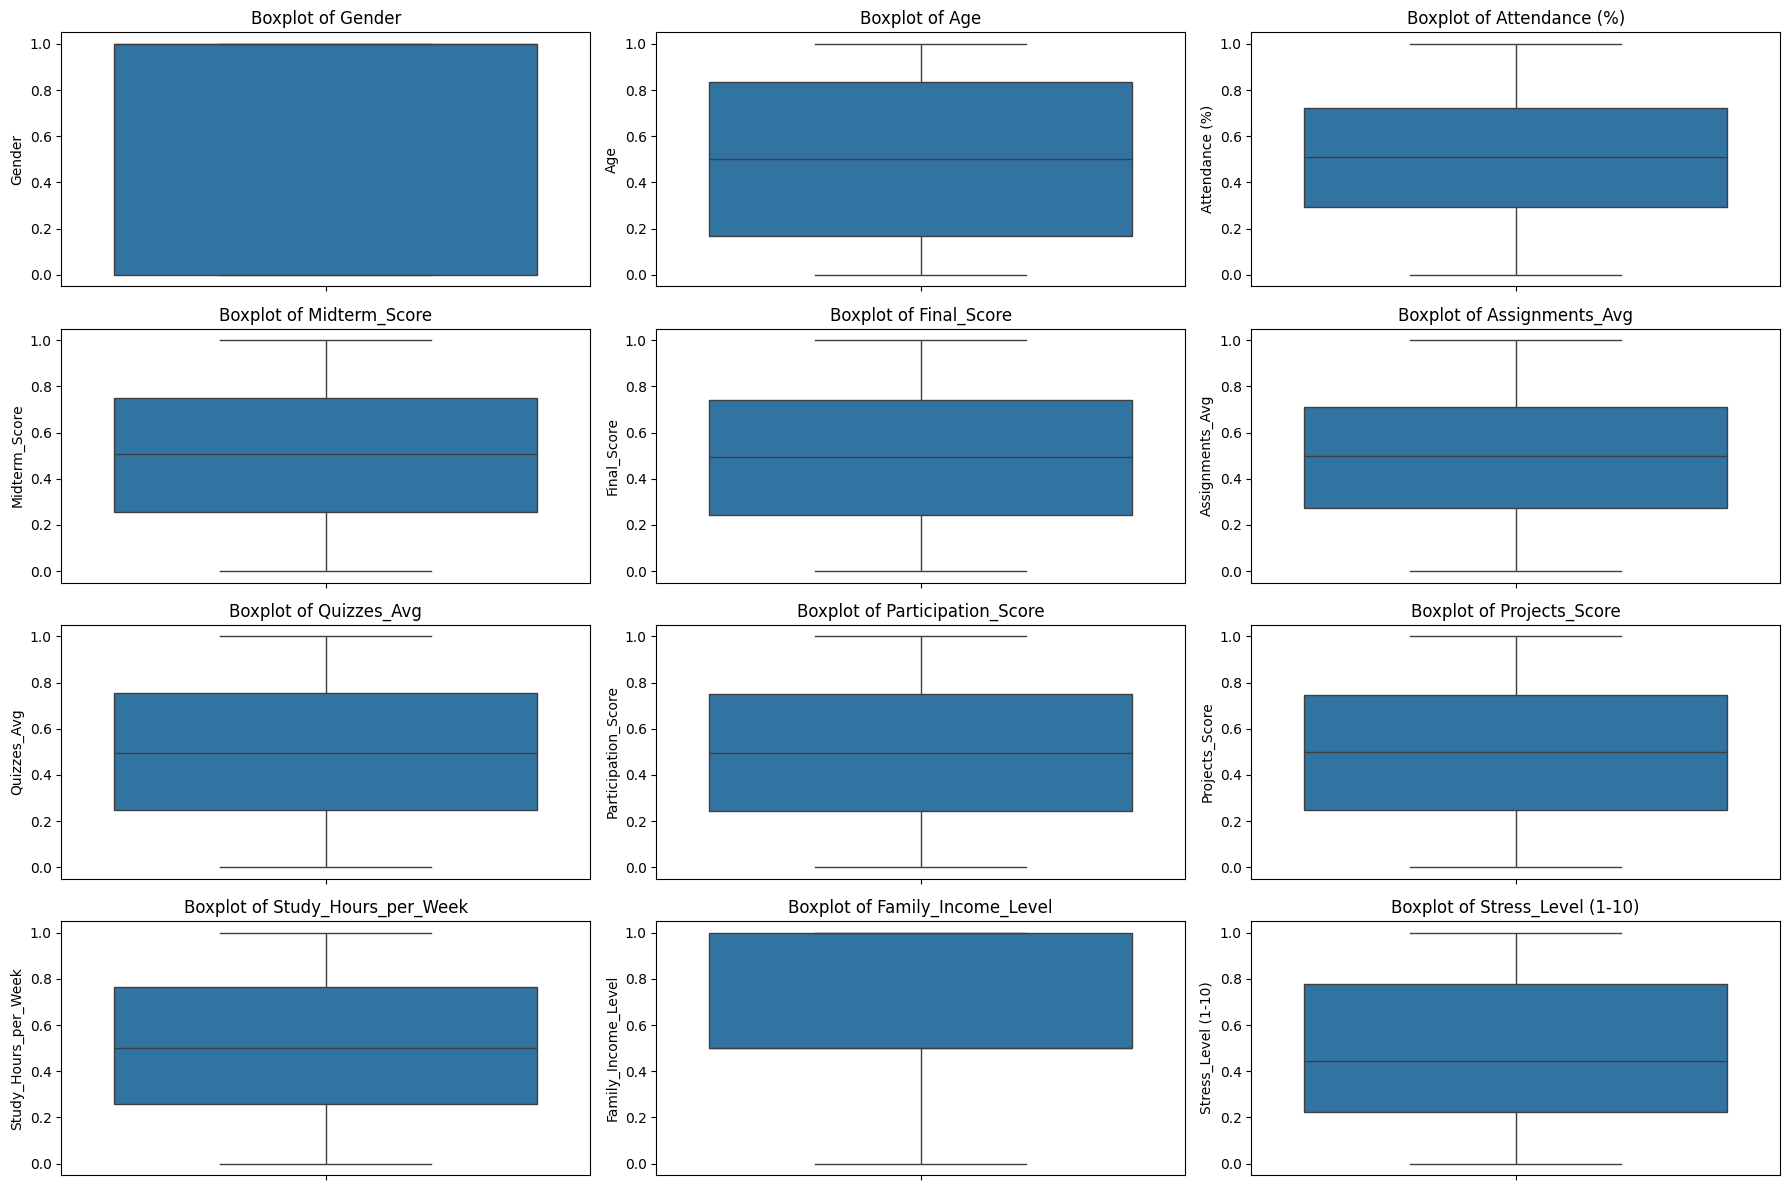

In [ ]:
# Boxplot for outlier visualization
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

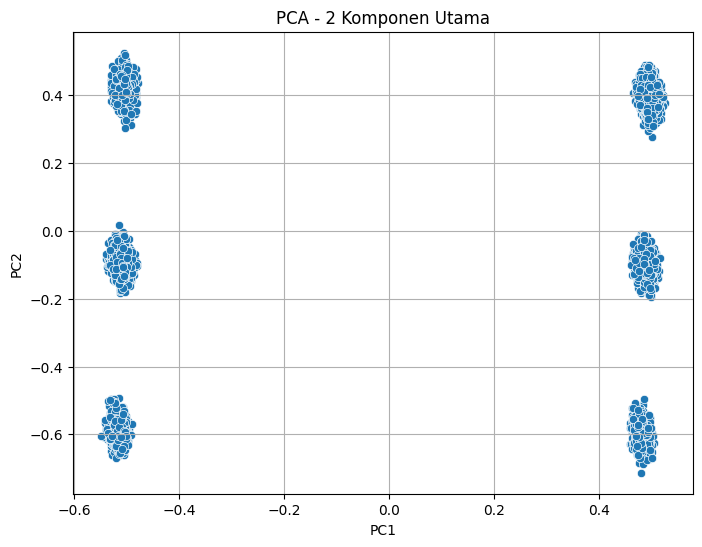

In [ ]:
# Coba dengan 2 komponen
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)

# Visualisasi komponen utama
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1])
plt.title('PCA - 2 Komponen Utama')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

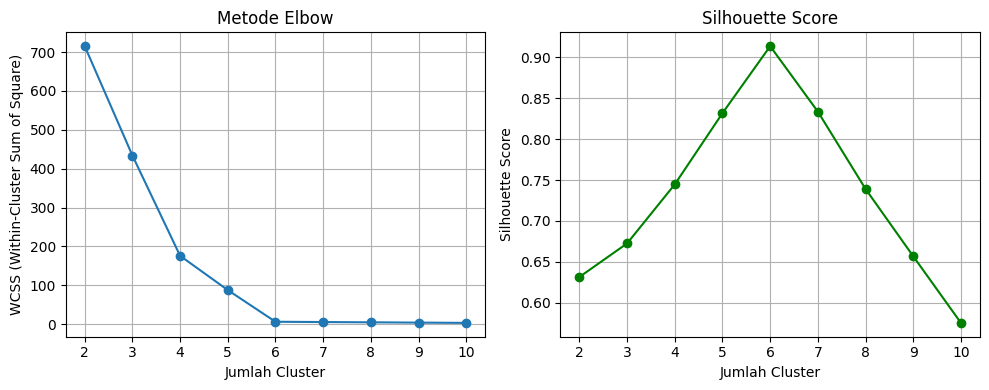

In [ ]:

# Inisialisasi
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)  # mulai dari 2 karena silhouette tidak valid untuk 1 cluster

# Loop untuk hitung WCSS dan Silhouette Score
for k in cluster_range:
    kmeans = KMeans(n_clusters=k,  init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(pca_components)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_components, labels))

# --- Visualisasi Elbow Method ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.grid(True)

# --- Visualisasi Silhouette Score ---
plt.subplot(1,2,2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Lakukan clustering dengan 6 cluster (hasil dari elbow method)
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(pca_components)

# Hitung silhouette score
score = silhouette_score(pca_components, cluster_labels)
print(f"Silhouette Score untuk 6 cluster: {score:.4f}")

Silhouette Score untuk 6 cluster: 0.9137


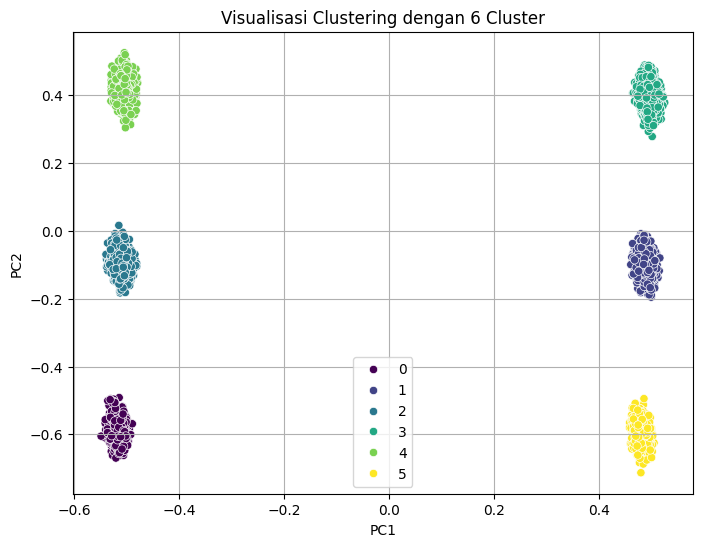

In [ ]:
# Visualisasi hasil clustering dengan 6 cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Visualisasi Clustering dengan 6 Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



** Cluster 0 **


,count,mean,std,min,25%,50%,75%,max
Gender,499.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,499.0,0.533400,0.328781,0.000000,0.333333,0.500000,0.833333,1.000000
Attendance (%),499.0,0.505937,0.264331,0.002601,0.315063,0.508530,0.699940,0.998600
Midterm_Score,499.0,0.505689,0.285886,0.003334,0.254502,0.498499,0.762838,0.997833
Final_Score,499.0,0.490518,0.292706,0.002001,0.219406,0.513338,0.738913,0.999333
Assignments_Avg,499.0,0.496513,0.272602,0.000400,0.259604,0.496172,0.699280,0.999600
Quizzes_Avg,499.0,0.501762,0.293629,0.002003,0.239335,0.510915,0.740036,1.000000
Participation_Score,499.0,0.493244,0.281349,0.000000,0.258000,0.498000,0.727000,0.999000
Projects_Score,499.0,0.512545,0.292107,0.002200,0.258652,0.520904,0.750550,0.998000
Study_Hours_per_Week,499.0,0.531904,0.287501,0.004000,0.310000,0.504000,0.804000,1.000000


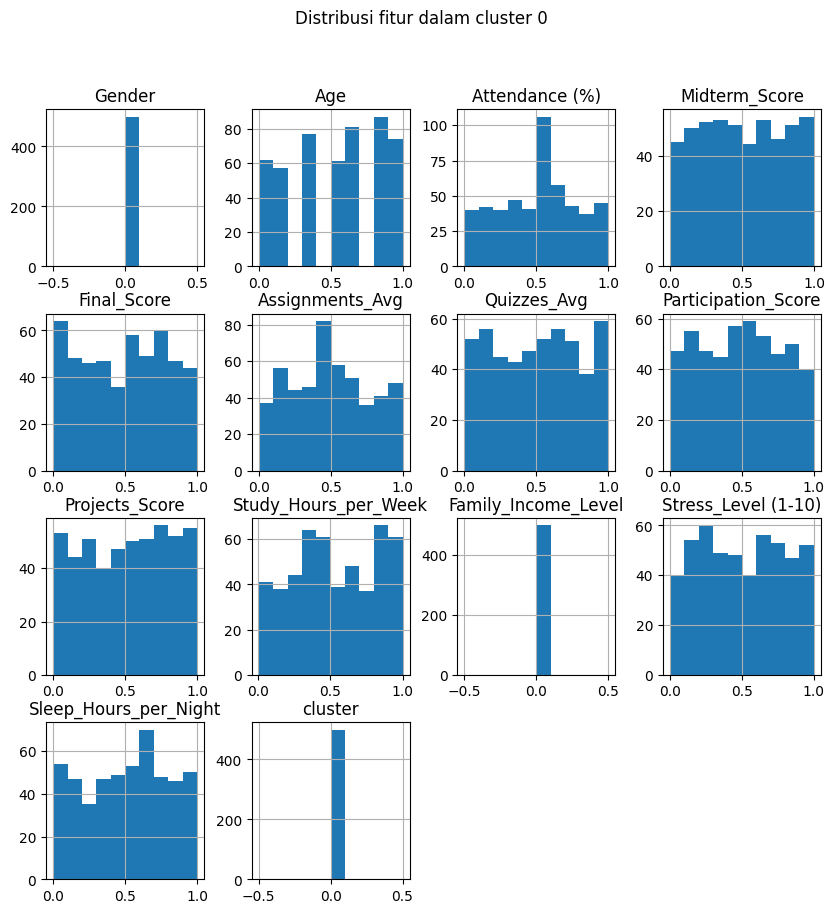

Karakteristik Cluster 0:
Kelompok Rentan Akademik & Sosial

** Cluster 1 **


,count,mean,std,min,25%,50%,75%,max
Gender,972.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,972.0,0.502401,0.330221,0.000000,0.166667,0.500000,0.833333,1.000000
Attendance (%),972.0,0.503275,0.278331,0.000000,0.276155,0.508530,0.721344,0.999800
Midterm_Score,972.0,0.518954,0.292762,0.001000,0.265213,0.531761,0.768048,0.999667
Final_Score,972.0,0.496506,0.282282,0.003001,0.261254,0.488079,0.729993,1.000000
Assignments_Avg,972.0,0.501950,0.272325,0.000000,0.290416,0.496172,0.714486,0.995998
Quizzes_Avg,972.0,0.510658,0.285867,0.001202,0.261416,0.522031,0.761716,1.000000
Participation_Score,972.0,0.512242,0.287532,0.001000,0.271750,0.503500,0.761500,0.998000
Projects_Score,972.0,0.491769,0.285419,0.000400,0.237397,0.482296,0.736047,1.000000
Study_Hours_per_Week,972.0,0.500070,0.292478,0.000000,0.256000,0.492000,0.753000,1.000000


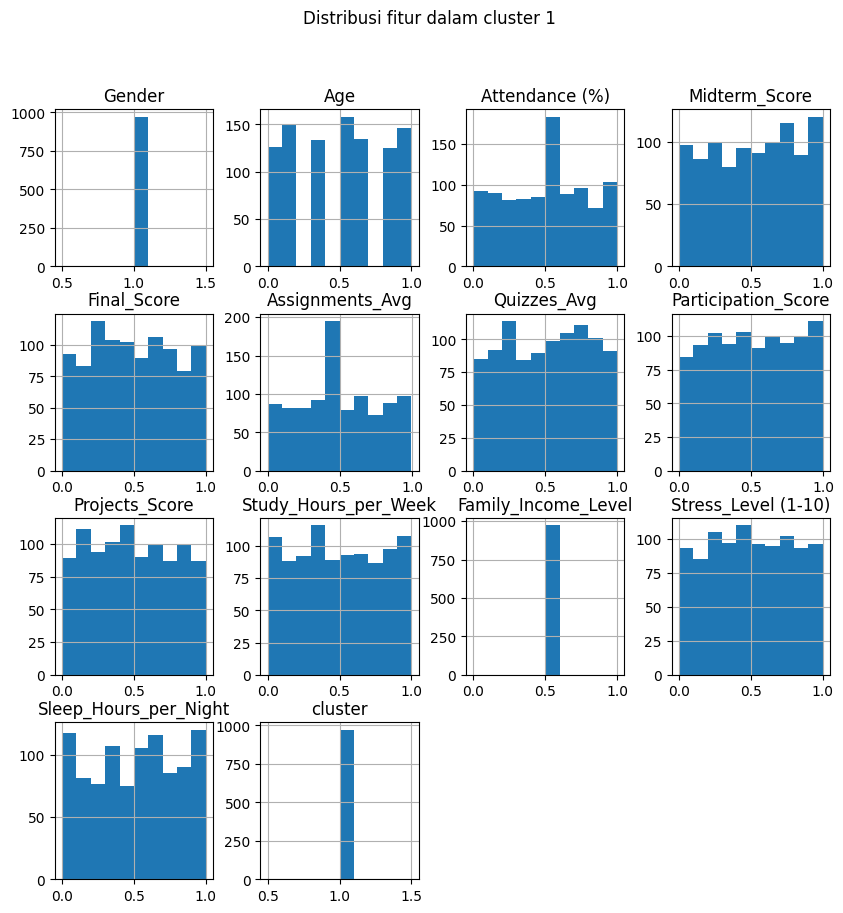

Karakteristik Cluster 1:
Mahasiswa Ideal & Seimbang

** Cluster 2 **


,count,mean,std,min,25%,50%,75%,max
Gender,1011.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,1011.0,0.500659,0.329432,0.000000,0.166667,0.500000,0.833333,1.000000
Attendance (%),1011.0,0.503192,0.270649,0.003801,0.285957,0.508530,0.723145,0.999200
Midterm_Score,1011.0,0.488229,0.283442,0.000000,0.242081,0.489496,0.731077,0.999000
Final_Score,1011.0,0.481667,0.283907,0.000167,0.236662,0.473991,0.719490,1.000000
Assignments_Avg,1011.0,0.508753,0.277023,0.000800,0.288916,0.496172,0.730292,0.998800
Quizzes_Avg,1011.0,0.486714,0.286142,0.000601,0.252954,0.469257,0.744943,0.998999
Participation_Score,1011.0,0.488666,0.293055,0.000000,0.227500,0.471000,0.748500,1.000000
Projects_Score,1011.0,0.489399,0.288062,0.000200,0.233847,0.490698,0.741248,0.997800
Study_Hours_per_Week,1011.0,0.514959,0.293431,0.000000,0.264000,0.520000,0.780000,1.000000


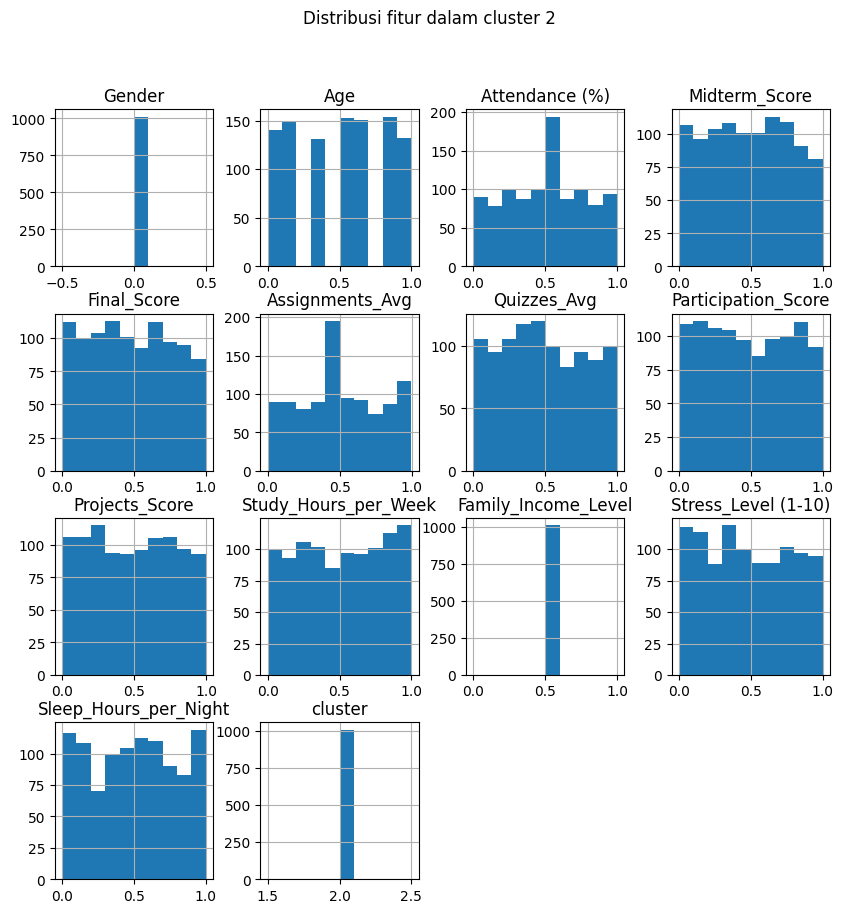

Karakteristik Cluster 2:
Pejuang Akademik Bertekanan Tinggi

** Cluster 3 **


,count,mean,std,min,25%,50%,75%,max
Gender,1034.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,1034.0,0.515796,0.331502,0.000000,0.166667,0.500000,0.833333,1.000000
Attendance (%),1034.0,0.507420,0.273798,0.000400,0.296709,0.508530,0.725695,0.999000
Midterm_Score,1034.0,0.506809,0.292550,0.000167,0.247958,0.511921,0.759128,1.000000
Final_Score,1034.0,0.496676,0.287804,0.000333,0.252167,0.495582,0.749500,0.998833
Assignments_Avg,1034.0,0.486082,0.272539,0.002201,0.258954,0.496172,0.706032,0.999400
Quizzes_Avg,1034.0,0.499103,0.292089,0.000000,0.250551,0.500100,0.752153,0.999800
Participation_Score,1034.0,0.487943,0.287919,0.001000,0.237250,0.483000,0.737500,0.999000
Projects_Score,1034.0,0.500456,0.293101,0.000000,0.239298,0.494799,0.761302,0.998600
Study_Hours_per_Week,1034.0,0.495149,0.291986,0.000000,0.244000,0.480000,0.748000,1.000000


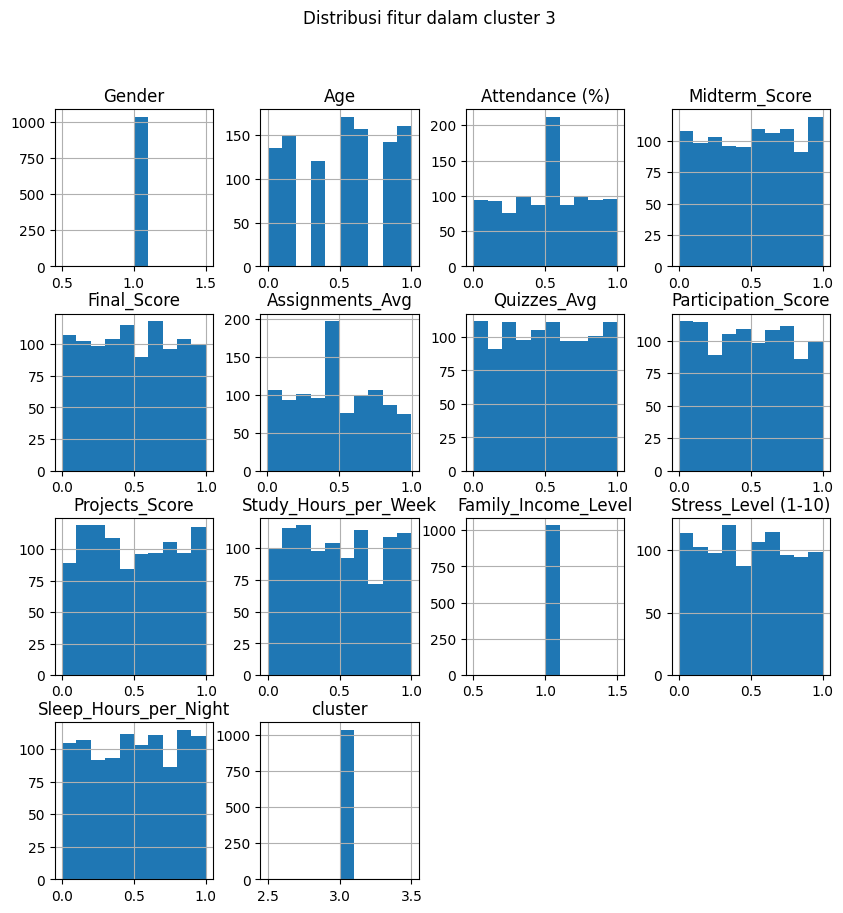

Karakteristik Cluster 3:
Mahasiswa Stabil & Rata-rata

** Cluster 4 **


,count,mean,std,min,25%,50%,75%,max
Gender,939.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,939.0,0.514732,0.331805,0.000000,0.166667,0.500000,0.833333,1.000000
Attendance (%),939.0,0.520131,0.271513,0.004201,0.313763,0.508530,0.734947,1.000000
Midterm_Score,939.0,0.513896,0.280197,0.003168,0.282511,0.518173,0.748499,0.998499
Final_Score,939.0,0.507241,0.291179,0.000000,0.246582,0.515839,0.766589,0.999833
Assignments_Avg,939.0,0.489623,0.276142,0.000000,0.254602,0.496172,0.715586,1.000000
Quizzes_Avg,939.0,0.509156,0.292396,0.000801,0.258262,0.507711,0.773383,0.998197
Participation_Score,939.0,0.520923,0.285115,0.002000,0.275500,0.530000,0.768000,1.000000
Projects_Score,939.0,0.503690,0.284299,0.000600,0.266553,0.518304,0.738048,0.999600
Study_Hours_per_Week,939.0,0.497819,0.288838,0.000000,0.240000,0.504000,0.744000,1.000000


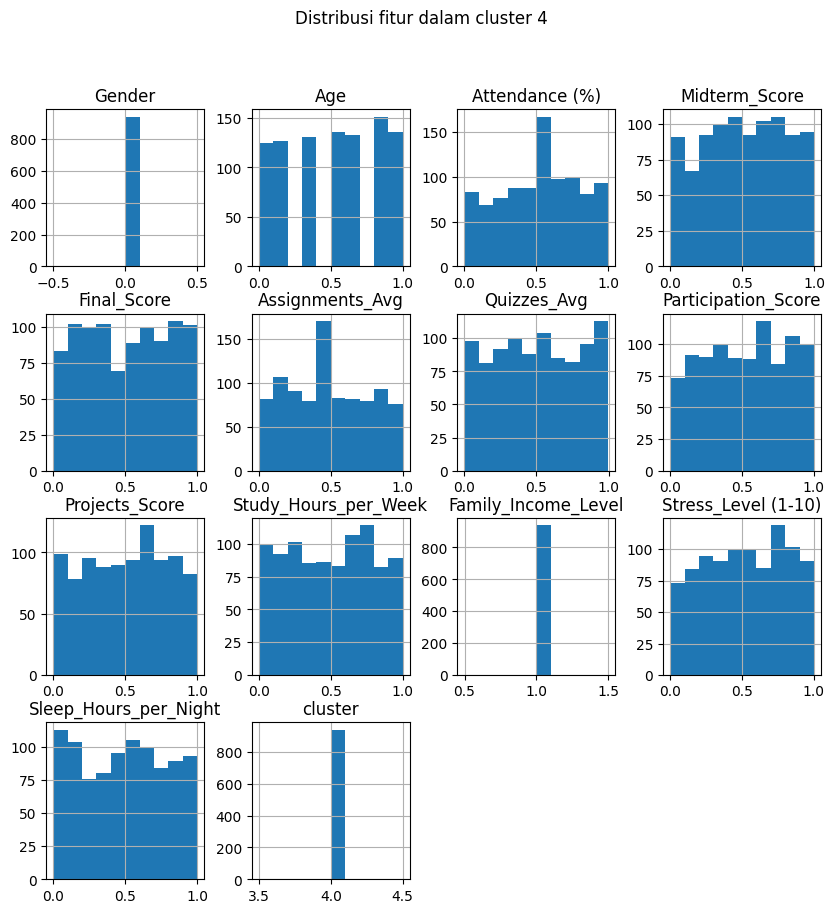

Karakteristik Cluster 4:
Mahasiswa Berprestasi dengan Dukungan Sosial

** Cluster 5 **


,count,mean,std,min,25%,50%,75%,max
Gender,545.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,545.0,0.482569,0.339784,0.000000,0.166667,0.500000,0.833333,1.000000
Attendance (%),545.0,0.512298,0.270424,0.000600,0.304461,0.508530,0.723945,0.997800
Midterm_Score,545.0,0.497487,0.284431,0.000167,0.253751,0.494498,0.738413,0.999166
Final_Score,545.0,0.489337,0.290927,0.000167,0.232411,0.496832,0.753251,1.000000
Assignments_Avg,545.0,0.492642,0.262679,0.000200,0.287515,0.496172,0.695478,0.995398
Quizzes_Avg,545.0,0.474467,0.296502,0.000000,0.214300,0.454837,0.738234,0.996195
Participation_Score,545.0,0.473877,0.297129,0.002000,0.202000,0.467000,0.741000,1.000000
Projects_Score,545.0,0.500929,0.290578,0.000200,0.264853,0.498700,0.743549,0.996599
Study_Hours_per_Week,545.0,0.514172,0.288368,0.000000,0.264000,0.524000,0.764000,1.000000


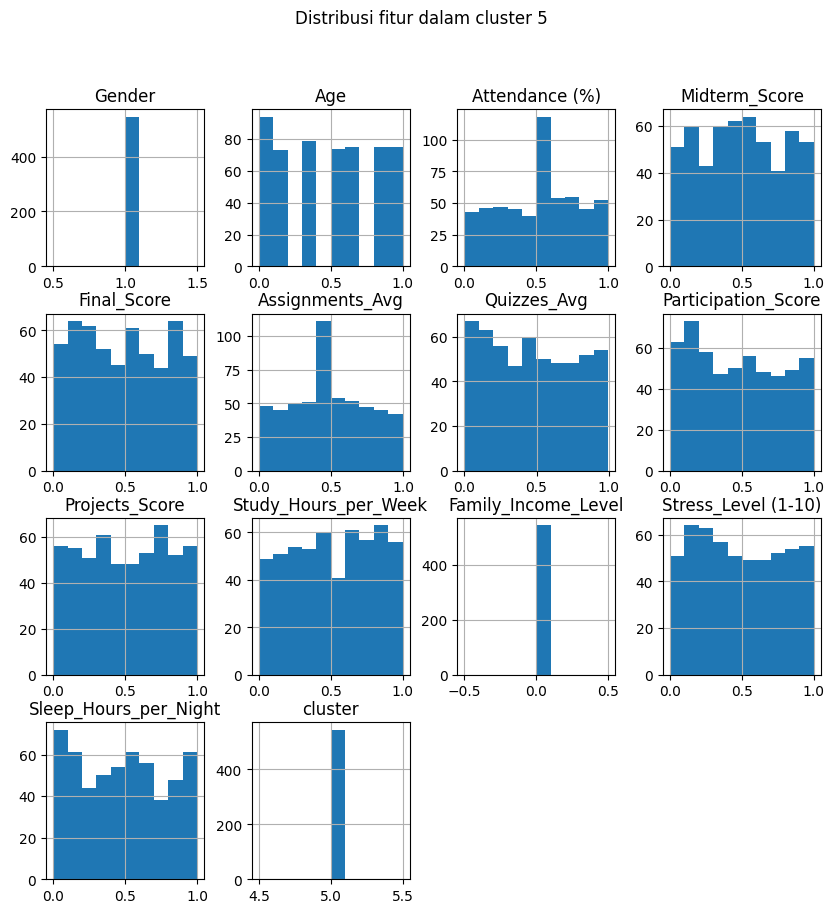

Karakteristik Cluster 5:
Kelompok Tekanan Tinggi dengan Potensi


In [ ]:
# Tambahkan kolom 'cluster' ke DataFrame
df['cluster'] = cluster_labels

# Definisikan penjelasan karakteristik tiap cluster
cluster_descriptions = {
    0: "Kelompok Rentan Akademik & Sosial",
    1: "Mahasiswa Ideal & Seimbang",
    2: "Pejuang Akademik Bertekanan Tinggi",
    3: "Mahasiswa Stabil & Rata-rata",
    4: "Mahasiswa Berprestasi dengan Dukungan Sosial",
    5: "Kelompok Tekanan Tinggi dengan Potensi"
}

# Loop tiap cluster dan tampilkan statistik + deskripsi
for cluster_num in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"\n** Cluster {cluster_num} **")
    display(cluster_data.describe().transpose())

    # Plot histogram fitur dalam cluster
    cluster_data.hist(figsize=(10,10))
    plt.suptitle(f"Distribusi fitur dalam cluster {cluster_num}")
    plt.show()

    # Tambahkan penjelasan karakteristik
    if cluster_num in cluster_descriptions:
        print(f"Karakteristik Cluster {cluster_num}:\n{cluster_descriptions[cluster_num]}")
